In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
X = df.drop(['target'],axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=7)

In [9]:
model = GradientBoostingClassifier()

In [10]:
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)


0.7591699604743082

In [11]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='deviance',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
          

In [12]:
rfe.support_

array([ True, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True])

In [36]:
pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank']).head()

,Rank
age,True
sex,False
cp,True
trestbps,False
chol,True


In [13]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [14]:
rfe.ranking_

array([1, 2, 1, 4, 1, 7, 6, 1, 5, 1, 3, 1, 1])

In [15]:
rf_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

In [16]:
rf_df.head()

,Rank
age,1
cp,1
chol,1
thalach,1
oldpeak,1


In [17]:
np.std(n_scores)

0.07954589399137202

In [18]:
pipe.score(X_test, y_test)

0.8157894736842105

In [19]:
predictions = pipe.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
confusion_matrix(y_test, predictions)

array([[24,  9],
       [ 5, 38]])

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [23]:
from sklearn.feature_selection import RFECV

In [24]:
rfecv = RFECV(estimator=GradientBoostingClassifier())

In [25]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.7769169960474308

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Feature Selection',
                 RFECV(cv=None,
                       estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                            criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.1,
                                                            loss='deviance',
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                   

In [27]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


In [28]:
rfecv.support_

array([ True, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True])

In [29]:
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df.head()

,Rank
age,1
cp,1
chol,1
thalach,1
oldpeak,1


In [30]:
rfecv.ranking_

array([1, 2, 1, 4, 1, 7, 6, 1, 5, 1, 3, 1, 1])

In [31]:
rfecv.grid_scores_

array([0.6257971 , 0.66038647, 0.69613527, 0.70521739, 0.74038647,
       0.74917874, 0.77584541, 0.75352657, 0.74483092, 0.76231884,
       0.75381643, 0.74937198, 0.75816425])

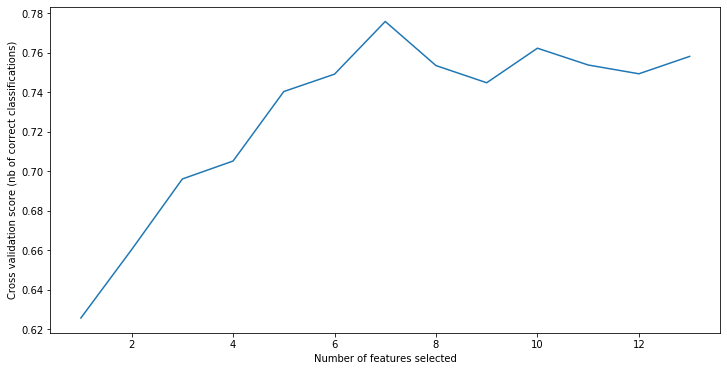

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()